# Power Spectral Density Randomizer

Below code will be used to randomize light color asuming it is being produced by a light bulb with a temperature rating T (K). To do this, I will radomize the frequencies by choosing a random frequency with uniform probabilty and then a random value of spectral radiance with uniform probability. If the random value of spectral radiance is less than the value of Planck's law calculated with the random frequency I will store the random frequency, otherwise I will repeat the random sampling. I will do this until I have N frequencies.

Planck's Law
$B(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_BT}}-1}$

Aside: This is Planck's law in 3D, I think that will be correct for our idea, but I have not completely thought it through

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from scipy import special as sf

In [63]:
T=5800 #Temperature in Kelvin (5800 is approximately the BB-temp of sun)
N=1000000 #number of samples we want
f=[] #list of frequencies, to be filled
c= 3*10**8 #constant speed of light in m/s
h = 6.6261*10**(-34) #Planck's constant in J/s
kB = 1.381*10**(-23) #Boltzmann constant in 1/K
wF = 3.157*kB*T/h #This is Wien's frequency, using Wien's law, calculate the peak frequency, use this to get the domain of interest

In [64]:
def p_law(f):
    return (2*h*f**3/(c**2))*(1/(np.exp(h*f/(kB*T))-1))

In [65]:
def generator():
    i=0
    while i<=N:
        nu = np.random.uniform(low = .001*wF, high = 5*wF)
        B = np.random.uniform(high = 1.05*p_law(wF))
        if B<p_law(nu):
            f.append(nu)
            i+=1
            yield

        else:
            pass
    
        
for _ in tqdm(generator(), total = N+1): pass

  0%|          | 0/1000001 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

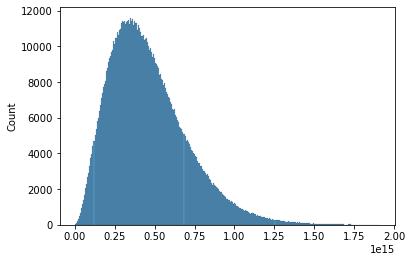

In [66]:
sns.histplot(f)

# Coupling Effiency
In the code below, we will choses a random angle between 0 and 90 degrees. This angle will represent the polarization of a photon. This will be chosen from a uniform distribution as we want to describe light being generated from a lightbulb.

In [69]:
theta = np.random.uniform(high = np.pi/2)

In [72]:
epc=1/2*(np.cos(theta)-np.sin(theta))

# Radiation Direction
In the code below, we want to describe the the direction -- which we will do using a polar and azimuthal angle -- 

In [54]:
sigma=.1
a=1
xi=sf.erf(a/(2*sigma))

n=0
xs=[]
ys=[]
while n<100000:
    u1 = np.random.uniform(low = 0, high = 1)
    x=sigma*sf.erfinv(2*xi*u1-xi)
    
    u2 = np.random.uniform(low = 0, high = 1)
    
    y=sigma*sf.erfinv(2*xi*(u2/u1)-xi)
    
    xs.append(x)
    ys.append(y)
    n+=1


(array([   31.,   414.,  2476.,  8463., 15039., 14217.,  7056.,  1920.,
          214.,    17.]),
 array([-0.28342426, -0.22561378, -0.1678033 , -0.10999282, -0.05218234,
         0.00562813,  0.06343861,  0.12124909,  0.17905957,  0.23687005,
         0.29468053]),
 <BarContainer object of 10 artists>)

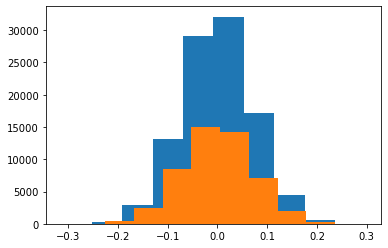

In [56]:
#plt.plot(xs, ys, 'o', color='red')
plt.hist(ys)
plt.hist(xs)


In [7]:
xs

[0.06668914169277504,
 0.004717642623055688,
 0.027630554893767225,
 0.03579577167776561,
 0.04767910441293313,
 0.06571692399416122,
 0.0032118517534049495,
 0.04064934374314635,
 0.025566816680905328,
 0.03550697670547413,
 0.05627463435966431,
 0.06407909328792656,
 0.03780929018630815,
 0.04182478157248371,
 0.06460695805329018,
 0.03987375415151416,
 0.06409800383125774,
 0.04801506385757497,
 0.045310706256893866,
 0.07103972172414794,
 0.010110158893716152,
 0.017685130877078167,
 0.022168262890439834,
 0.044406969835157316,
 0.056814414688759585,
 0.029171771616228845,
 0.017274804770854118,
 0.051822120863181935,
 0.01597956604944625,
 0.023273331853833405,
 0.015553755784846777,
 0.05062292669621163,
 0.001325806781294578,
 0.05147865370099066,
 0.06774289011012212,
 0.06720237275091943,
 0.029489489617234223,
 0.06765100823304974,
 0.03776250910150915,
 4.5019066824162066e-05,
 0.01128359519632133,
 0.05131090946441183,
 0.05097218999346348,
 0.06737182309214368,
 0.03819021

In [21]:
u1 = 0
y=a/2
x=sigma*sf.erfinv(u1/(norm*2*sf.erf(a/(2*sigma)))-sf.erf(a/2*sigma))
x

-0.055444499999999994

In [24]:
sf.erfinv(sf.erf(-a/(2*sigma)))

-1.5015015015015014

In [23]:
a/(2*sigma)

1.5015015015015014

In [31]:
u1 = np.random.uniform()

In [32]:
u1

0.6206783056617066